In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

## Label Encoding

In [23]:
df = pd.read_csv("data.csv")
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [24]:
df.shape

(169, 4)

In [25]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [26]:
# Checking null values
df.isna().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [27]:
# Data Cleaning
df.drop_duplicates(inplace=True)
median = df['Calories'].median()
df['Calories'].fillna(median, inplace=True)
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [28]:
# Adding a new column
q_1 = df['Calories'].quantile(q=0.25) # very low
q_2 = df['Calories'].median() # low/few
q_3 = df['Calories'].quantile(q=0.75) # normal
q_4 = df['Calories'].max() # high
df['Category'] = pd.cut(x=df['Calories'], bins=[0, q_1, q_3, q_4], labels=['few', 'normal', 'high'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 168
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Duration  162 non-null    int64   
 1   Pulse     162 non-null    int64   
 2   Maxpulse  162 non-null    int64   
 3   Calories  162 non-null    float64 
 4   Category  162 non-null    category
dtypes: category(1), float64(1), int64(3)
memory usage: 6.6 KB


In [30]:
# Grouping by category
df.groupby(['Category']).mean()

,Duration,Pulse,Maxpulse,Calories
Category,,,,
few,35.000000,106.951220,130.146341,185.634146
normal,55.125000,108.725000,135.737500,318.951250
high,111.097561,106.487805,135.512195,683.975610


In [ ]:
# Resetting index because Label Encoding maps values by index
df.reset_index(inplace=True, drop=True)

In [31]:
# Applying label-encoding on "Category"
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['Category'])
print(integer_encoded)

[1 1 2 2 1 2 2 0 0 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 2 0 0 2 2 2 0 0 2 0 2 1 2
 2 2 1 1 2 1 2 2 1 2 1 2 1 0 1 1 2 0 2 1 1 1 2 0 1 1 1 0 1 1 1 1 2 1 0 2 1
 1 2 2 0 1 0 2 0 1 0 0 1 2 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 2 2 0 2 2 1
 2 2 2 0 0 2 2 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 0 1 2 0 2 1 2 1 2 0 1 2 2 2 2
 2 2 2 2 0 0 2 2 2 2 2 2 2 2]


In [32]:
# Replace categories values with encoded labels
df["Category"].replace(to_replace=df["Category"].tolist(), value=integer_encoded, inplace = True)
df.head()

,Duration,Pulse,Maxpulse,Calories,Category
0,60,110,130,409.1,1
1,60,117,145,479.0,1
2,60,103,135,340.0,2
3,45,109,175,282.4,2
4,45,117,148,406.0,1


          Duration     Pulse  Maxpulse  Calories  Category
Duration  1.000000 -0.162098  0.003578  0.922754  0.081476
Pulse    -0.162098  1.000000  0.787035  0.018594  0.056952
Maxpulse  0.003578  0.787035  1.000000  0.196884  0.129821
Calories  0.922754  0.018594  0.196884  1.000000  0.088722
Category  0.081476  0.056952  0.129821  0.088722  1.000000


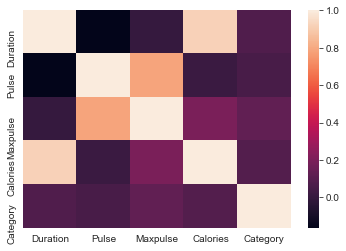

In [33]:
# Correlation between variables
sns.set_style("whitegrid")
corr = df.corr()
print(corr)

# Visualisation of correlation matrix
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [38]:
# Correlation coefficient
corr_coef = np.corrcoef(df["Duration"], df["Category"])[0, 1]
print("Correlation between Duration and Category:", round(corr_coef, 2))

Correlation between Duration and Category: 0.08


In [39]:
# Significance of correlation coefficient
ttest, pval = stats.ttest_ind(df["Duration"], df["Category"])
print("Independent t-test:", ttest, pval)

Independent t-test: 18.56604980653306 7.977320437537995e-53


Text(0.5, 1.0, 'Independent T-Test')

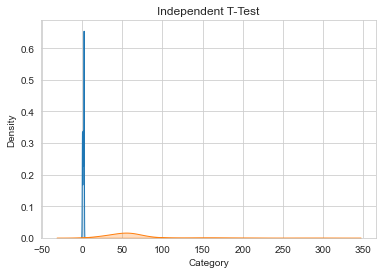

In [40]:
# Plotting the T-test
sns.kdeplot(df["Category"], shade=True)
sns.kdeplot(df["Duration"], shade=True)
plt.title("Independent T-Test")

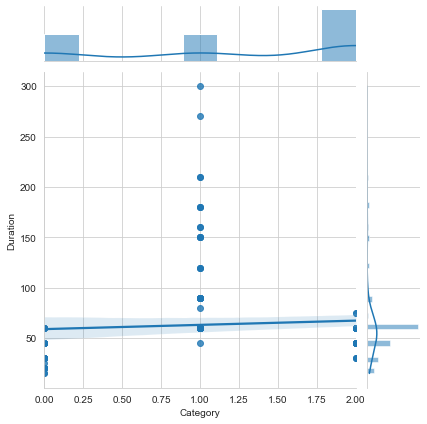

In [42]:
# Analysing correlation between Calories and Duration
sns.jointplot(kind="reg", x="Category", y="Duration", data=df)
plt.show()

## Ordinal Encoding

In [51]:
df = pd.read_csv("data.csv")
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [52]:
# Data Cleaning
df.drop_duplicates(inplace=True)
median = df['Calories'].median()
df['Calories'].fillna(median, inplace=True)
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [53]:
# Adding a new column
q_1 = df['Calories'].quantile(q=0.25) # very low
q_2 = df['Calories'].median() # low/few
q_3 = df['Calories'].quantile(q=0.75) # normal
q_4 = df['Calories'].max() # high
df['Category'] = pd.cut(x=df['Calories'], bins=[0, q_1, q_3, q_4], labels=['few', 'normal', 'high'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 168
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Duration  162 non-null    int64   
 1   Pulse     162 non-null    int64   
 2   Maxpulse  162 non-null    int64   
 3   Calories  162 non-null    float64 
 4   Category  162 non-null    category
dtypes: category(1), float64(1), int64(3)
memory usage: 6.6 KB


In [54]:
# Grouping by category
df.groupby(['Category']).mean()

,Duration,Pulse,Maxpulse,Calories
Category,,,,
few,35.000000,106.951220,130.146341,185.634146
normal,55.125000,108.725000,135.737500,318.951250
high,111.097561,106.487805,135.512195,683.975610


In [55]:
# Resetting index because Ordinal Encoding maps values by index
df.reset_index(inplace=True, drop=True)

In [56]:
calories_dict = {'few': 1, 'normal': 2, 'high': 3}

# Setting the new column type as int64
df['Category'] = df.Category.map(calories_dict).astype('int64')
df

,Duration,Pulse,Maxpulse,Calories,Category
0,60,110,130,409.1,3
1,60,117,145,479.0,3
2,60,103,135,340.0,2
3,45,109,175,282.4,2
4,45,117,148,406.0,3
...,...,...,...,...,...
157,60,105,140,290.8,2
158,60,110,145,300.0,2
159,60,115,145,310.2,2
160,75,120,150,320.4,2


          Duration     Pulse  Maxpulse  Calories  Category
Duration  1.000000 -0.162098  0.003578  0.922754  0.629267
Pulse    -0.162098  1.000000  0.787035  0.018594 -0.011240
Maxpulse  0.003578  0.787035  1.000000  0.196884  0.116243
Calories  0.922754  0.018594  0.196884  1.000000  0.665281
Category  0.629267 -0.011240  0.116243  0.665281  1.000000


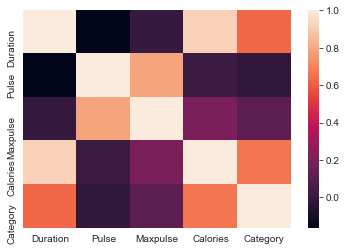

In [57]:
# Correlation between variables
sns.set_style("whitegrid")
corr = df.corr()
print(corr)

# Visualisation of correlation matrix
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [58]:
# Correlation coefficient
corr_coef = np.corrcoef(df["Duration"], df["Category"])[0, 1]
print("Correlation between Duration and Category:", round(corr_coef, 2))

Correlation between Duration and Category: 0.63


In [59]:
# Significance of correlation coefficient
ttest, pval = stats.ttest_ind(df["Duration"], df["Category"])
print("Independent t-test:", ttest, pval)

Independent t-test: 18.34304870226138 5.928840895158504e-52


Text(0.5, 1.0, 'Independent T-Test')

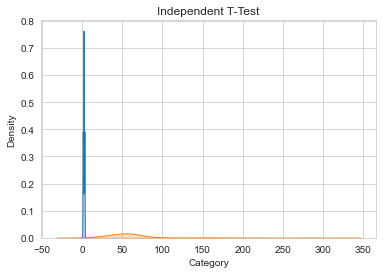

In [60]:
# Plotting the T-test
sns.kdeplot(df["Category"], shade=True)
sns.kdeplot(df["Duration"], shade=True)
plt.title("Independent T-Test")

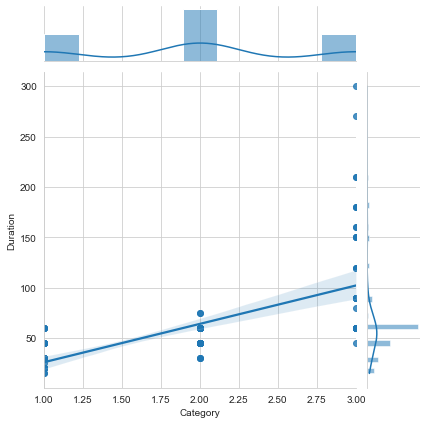

In [61]:
# Analysing correlation between Calories and Duration
sns.jointplot(kind="reg", x="Category", y="Duration", data=df)
plt.show()

## One-hot Encoding

In [71]:
df = pd.read_csv("data.csv")
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [72]:
# Data Cleaning
df.drop_duplicates(inplace=True)
median = df['Calories'].median()
df['Calories'].fillna(median, inplace=True)
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [73]:
# Adding a new column
q_1 = df['Calories'].quantile(q=0.25) # very low
q_2 = df['Calories'].median() # low/few
q_3 = df['Calories'].quantile(q=0.75) # normal
q_4 = df['Calories'].max() # high
df['Category'] = pd.cut(x=df['Calories'], bins=[0, q_1, q_3, q_4], labels=['few', 'normal', 'high'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 168
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Duration  162 non-null    int64   
 1   Pulse     162 non-null    int64   
 2   Maxpulse  162 non-null    int64   
 3   Calories  162 non-null    float64 
 4   Category  162 non-null    category
dtypes: category(1), float64(1), int64(3)
memory usage: 6.6 KB


In [74]:
# Grouping by category
df.groupby(['Category']).mean()

,Duration,Pulse,Maxpulse,Calories
Category,,,,
few,35.000000,106.951220,130.146341,185.634146
normal,55.125000,108.725000,135.737500,318.951250
high,111.097561,106.487805,135.512195,683.975610


In [75]:
# Resetting index because One-hot Encoding maps values by index
df.reset_index(inplace=True, drop=True)

In [76]:
# Applying One-hot Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoded = label_encoder.fit_transform(df['Category'])
label_reshaped = label_encoded.reshape(len(label_encoded), 1)


onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop='first', categories='auto')
onehot_encoded = onehot_encoder.fit_transform(label_reshaped)

onehotencoder_df = pd.DataFrame(onehot_encoded)
df = df.join(onehotencoder_df)
df

,Duration,Pulse,Maxpulse,Calories,Category,0,1
0,60,110,130,409.1,high,1.0,0.0
1,60,117,145,479.0,high,1.0,0.0
2,60,103,135,340.0,normal,0.0,1.0
3,45,109,175,282.4,normal,0.0,1.0
4,45,117,148,406.0,high,1.0,0.0
...,...,...,...,...,...,...,...
157,60,105,140,290.8,normal,0.0,1.0
158,60,110,145,300.0,normal,0.0,1.0
159,60,115,145,310.2,normal,0.0,1.0
160,75,120,150,320.4,normal,0.0,1.0


          Duration     Pulse  Maxpulse  Calories         0         1
Duration  1.000000 -0.162098  0.003578  0.922754  0.634625 -0.208311
Pulse    -0.162098  1.000000  0.787035  0.018594 -0.048504  0.068366
Maxpulse  0.003578  0.787035  1.000000  0.196884  0.044197  0.088547
Calories  0.922754  0.018594  0.196884  1.000000  0.669301 -0.217373
0         0.634625 -0.048504  0.044197  0.669301  1.000000 -0.574960
1        -0.208311  0.068366  0.088547 -0.217373 -0.574960  1.000000


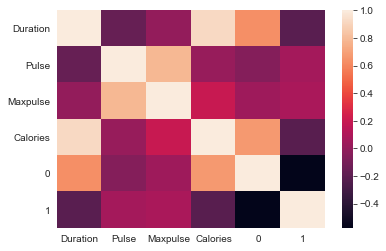

In [77]:
# Correlation between variables
sns.set_style("whitegrid")
corr = df.corr()
print(corr)

# Visualisation of correlation matrix
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [79]:
# Correlation coefficient
corr_coef = np.corrcoef(df["Duration"], df[0])[0, 1]
print("Correlation between Duration and Calories Few:", round(corr_coef, 2))

corr_coef = np.corrcoef(df["Duration"], df[1])[0, 1]
print("Correlation between Duration and Category High:", round(corr_coef, 2))

Correlation between Duration and Calories Few: 0.63
Correlation between Duration and Category High: -0.21


In [80]:
# Significance of correlation coefficient
ttest, pval = stats.ttest_ind(df["Duration"], df[0])
print("Independent t-test:", ttest, pval)

ttest, pval = stats.ttest_ind(df["Duration"], df[1])
print("Independent t-test:", ttest, pval)

Independent t-test: 18.85985716687065 5.685983389448324e-54
Independent t-test: 18.788543521705844 1.0792946813707245e-53


Text(0.5, 1.0, 'Independent T-Test')

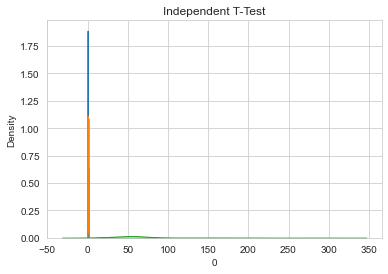

In [81]:
# Plotting the T-test
sns.kdeplot(df[0], shade=True)
sns.kdeplot(df[1], shade=True)
sns.kdeplot(df["Duration"], shade=True)
plt.title("Independent T-Test")

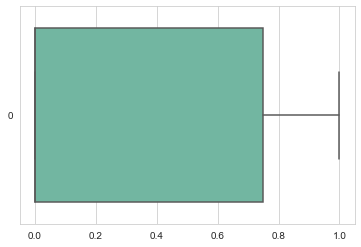

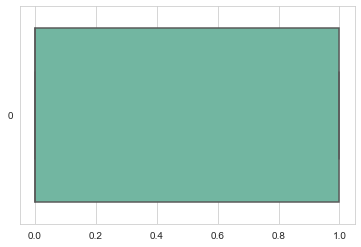

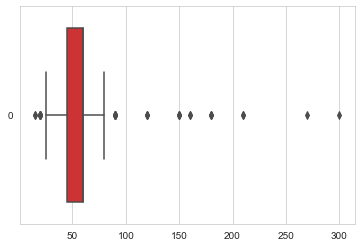

In [90]:
# Visualizing data distribution
calories_few = df[0]
calories_high = df[1]
duration = df["Duration"]

ax = sns.boxplot(data=calories_few, orient="h", palette="Set2")
plt.show()
ax = sns.boxplot(data=calories_high, orient="h", palette="Set2")
plt.show()
ax = sns.boxplot(data=duration, orient="h", palette="Set1")
plt.show()

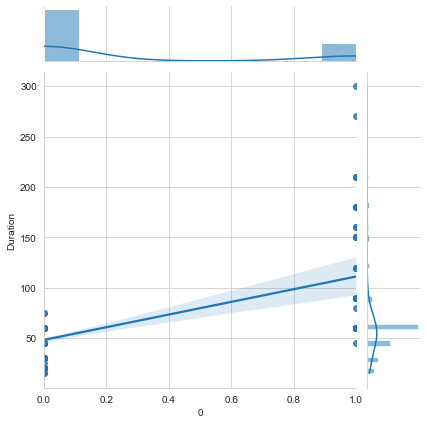

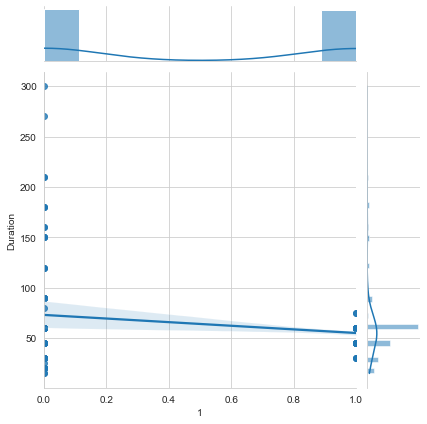

In [92]:
# Analysing correlation between Calories and Duration
sns.jointplot(kind="reg", x=0, y="Duration", data=df)
plt.show()

sns.jointplot(kind="reg", x=1, y="Duration", data=df)
plt.show()